Building a linear model to express the relationship between a car's milage(mpg) and other attributes

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps to split the data into parts

%matplotlib inline


In [ ]:
# If you want to use above libraries, use one statement
# from pyforest import*
# lazy_imports()

In [82]:
Data =pd.read_csv("auto-mpg.csv")
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [50]:
Data.shape
# Data.info()

(398, 9)

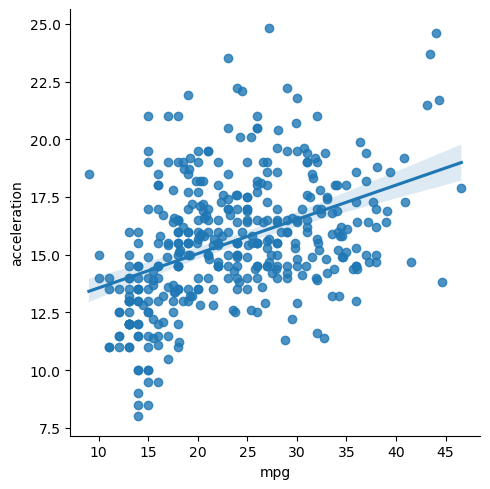

In [51]:
sns.lmplot(x ='mpg', y ='acceleration', data =Data, fit_reg =True) #use fit_reg to turn on/off the regression line
plt.show()

In [52]:
Data['mpg'].corr(Data['acceleration']) #shows positive correlation

0.42028891210165065

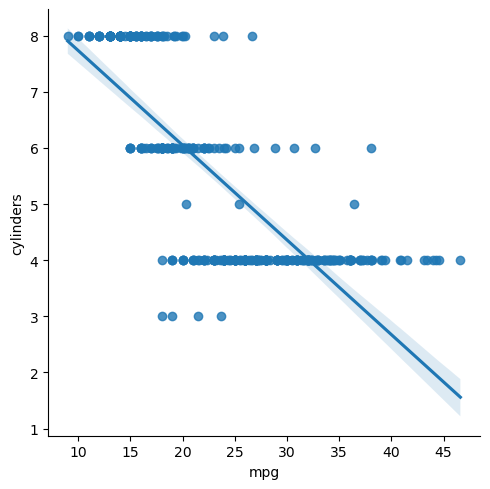

In [83]:
sns.lmplot(x ='mpg', y ='cylinders', data =Data, fit_reg =True)
plt.show()

In [54]:
Data['mpg'].corr(Data['cylinders'])
#shows the negative correlation

-0.7753962854205543

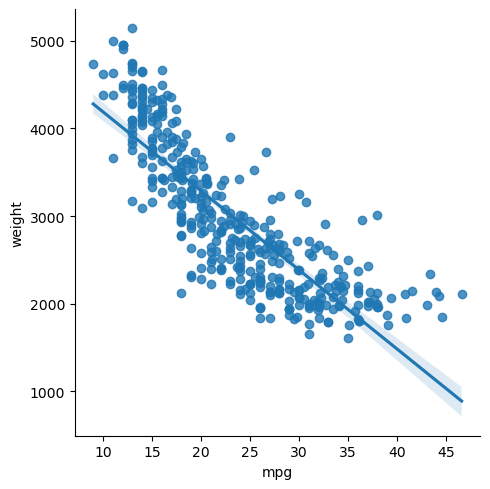

In [55]:
sns.lmplot(x ='mpg', y ='weight', data =Data, fit_reg =True)
plt.show()

In [56]:
Data['mpg'].corr(Data['weight']) #negative correlation

-0.8317409332443351

Strong positive correlation
Moderate positive correlation
No correlation

Modelate negative correlation
Strong negative correlation
Curvilinear correlation(both pstive and negative)

In [57]:
Data.describe() #works on the numerical columns (without Transponse, T)


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [58]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [59]:
Data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [110]:
#drop the car_name
df =Data.drop('car name', axis=1)
# df =Data.drop('car name', axis =1)
df =Data.drop('horsepower', axis=1)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,3449,10.5,70,1,ford torino


In [111]:
#replacing the categorical var with actual values
df['origin'] =df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head(20)

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,3449,10.5,70,america,ford torino
5,15.0,8,429.0,4341,10.0,70,america,ford galaxie 500
6,14.0,8,454.0,4354,9.0,70,america,chevrolet impala
7,14.0,8,440.0,4312,8.5,70,america,plymouth fury iii
8,14.0,8,455.0,4425,10.0,70,america,pontiac catalina
9,15.0,8,390.0,3850,8.5,70,america,amc ambassador dpl


In [112]:
#converting categorical variables to dummy variables 
df =pd.get_dummies(df, columns=['origin'])



In [113]:
df.head(20)

,mpg,cylinders,displacement,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,3449,10.5,70,ford torino,1,0,0
5,15.0,8,429.0,4341,10.0,70,ford galaxie 500,1,0,0
6,14.0,8,454.0,4354,9.0,70,chevrolet impala,1,0,0
7,14.0,8,440.0,4312,8.5,70,plymouth fury iii,1,0,0
8,14.0,8,455.0,4425,10.0,70,pontiac catalina,1,0,0
9,15.0,8,390.0,3850,8.5,70,amc ambassador dpl,1,0,0


In [114]:
#Dealing with missing values
df.isna().sum()
# df.isnull().values()


mpg               0
cylinders         0
displacement      0
weight            0
acceleration      0
model year        0
car name          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [115]:
df.dtypes #determines the datatypes
#hp is missing coz its not recognized as numerical column
#Thus test using isdigit() function

mpg               float64
cylinders           int64
displacement      float64
weight              int64
acceleration      float64
model year          int64
car name           object
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [91]:
digits_in_hp =pd.DataFrame(df.horsepower.str.isdigit())
# digits_in_hp
#isdigit() returns true if all characters in the string are digits

In [92]:
#print isDigit =False
df[digits_in_hp['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [93]:
df =df.replace('?', np.nan)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


C:\Users\HENRY\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


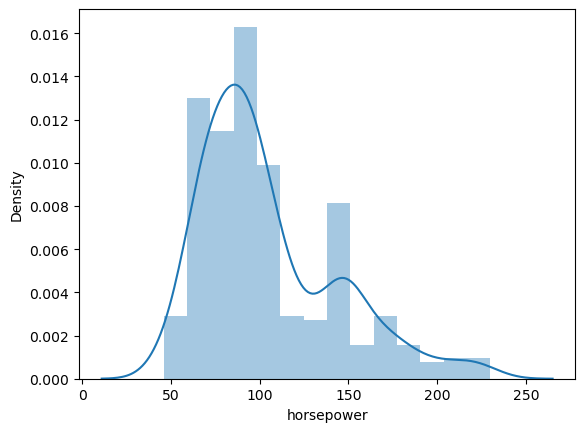

In [94]:
#Handling missing data without chopping them
sns.distplot(df['horsepower'])
plt.show()
#for skewed distribution, we cannot use mean, but rather median


#fill the missing values with the median of each column
df =df['horsepower'].fillna(df['horsepower'].median())
# df
# df.head()
# df.dtypes

#converting the hp column from object/string type to float
df['horsepower'] =df['horsepower'].astype('float64')


In [95]:
# df =df.drop()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [116]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
weight              int64
acceleration      float64
model year          int64
car name           object
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

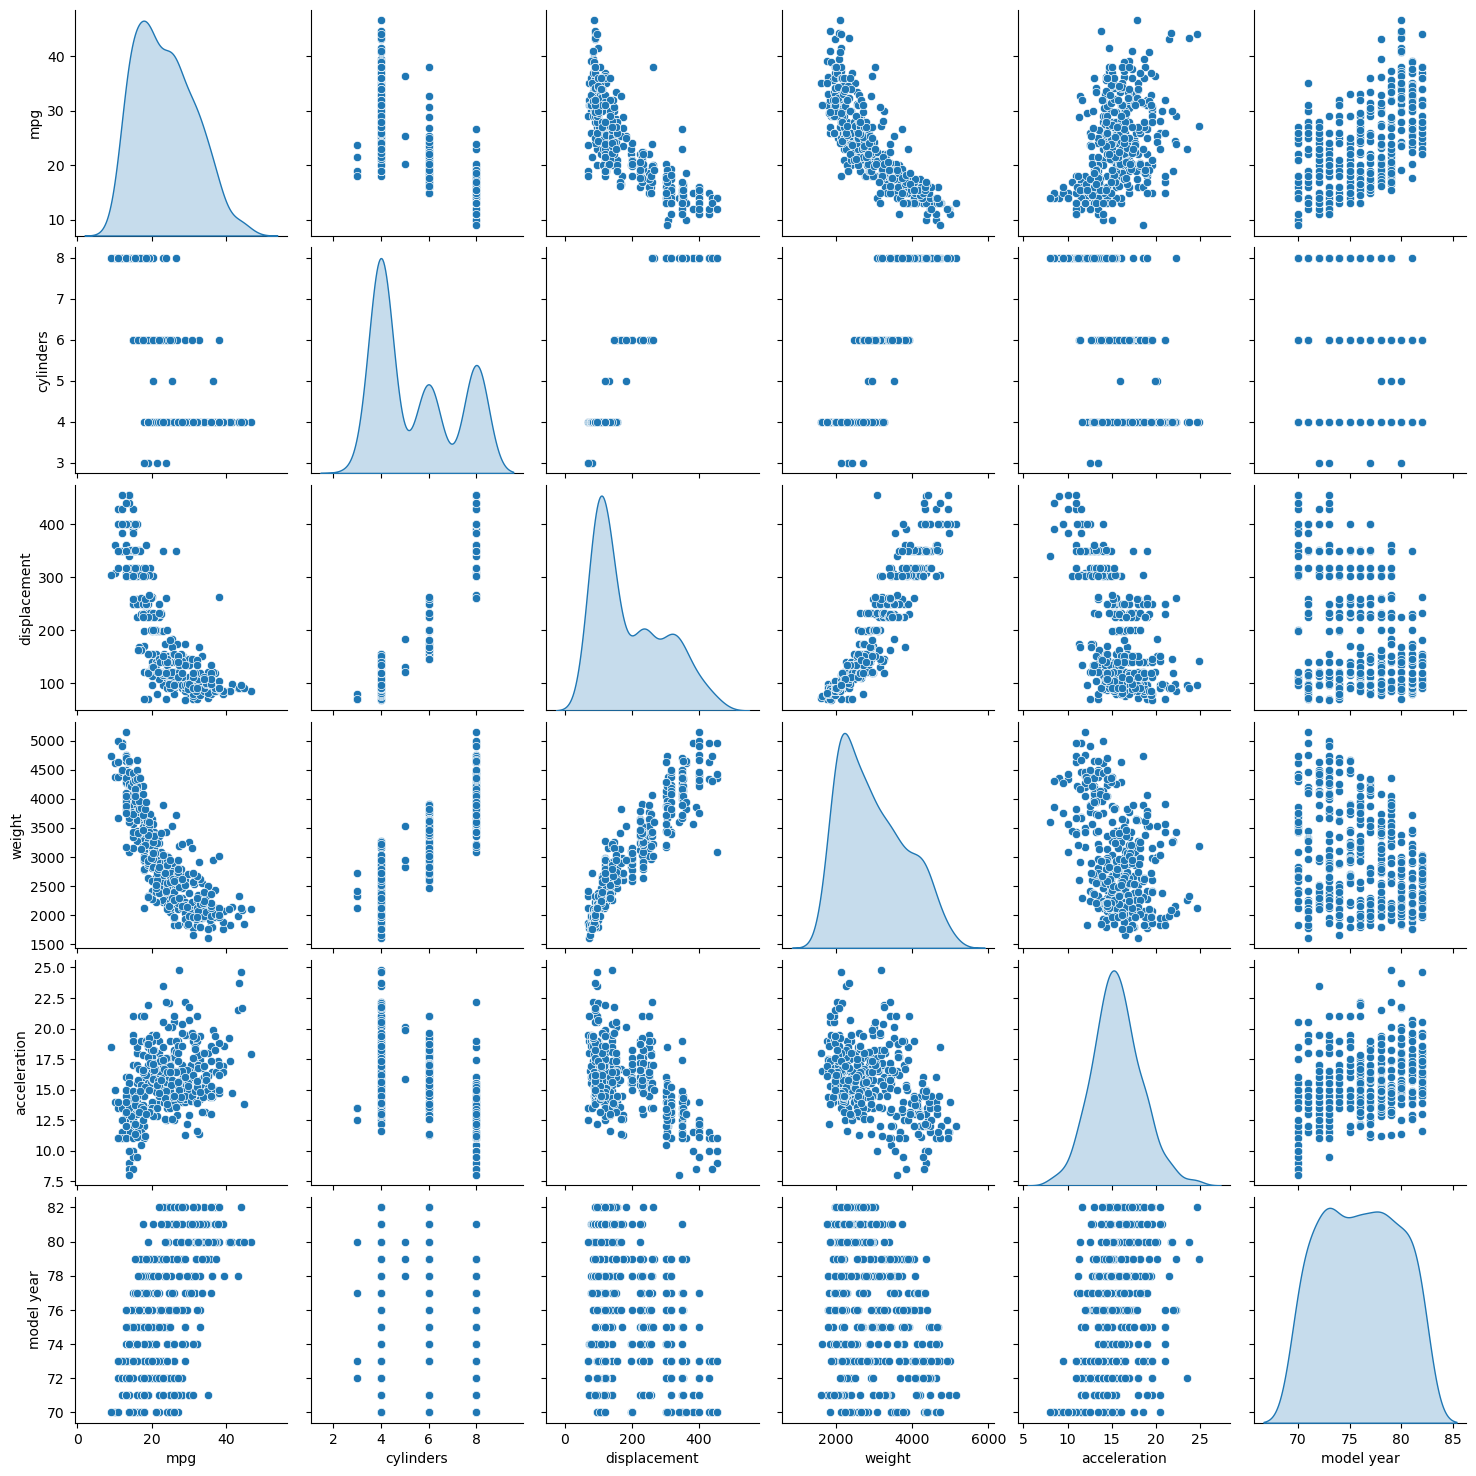

In [117]:
attr_select =df.iloc[:, 0:6]
sns.pairplot(attr_select, diag_kind ='kde') #kde helps to plot kind density estimate curve instead of histogram on the diag
#consider a upper or lower part of the pait plot

# Building a model/algorithm.
building a linear model to express the relationship between a car's milage  and the rest of other attributes

In [118]:
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,3449,10.5,70,ford torino,1,0,0


In [124]:
#independent variables
#always use axis=1 not 0
x =df.drop(['mpg'], axis =1)
#dependent variable
y =df[['mpg']]


In [128]:
#split x and y into training and test set in 70:30 ratio
#random_state =1 returns the same random variables once you run multiple times
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.30, random_state =1)

In [131]:
# Fit linear model(make the model learn)
regression_model =LinearRegression() #initialise the model
regression_model.fit(x_train, y_train) #learn from the training data

In [135]:
#y =mx+c
# regression_model.coef_  #gives us all the coefficients

In [ ]:
#prints out the coeficients of each column
for indx, col_name in enumerate(x_train.columns):
    print("coefficient of {}".format(col_name, regression_model.coef_[0]))
    

In [ ]:
#finding the intercept
intercept =regression_model.intercept_[0]
print("The intercept of our model is {}".format(intercept))

In [137]:
#checking the score of the model using training data
regression_model.score(x_train, y_train)

In [ ]:
regression_model.score(x_test, y_test)
#checking using test data

In [139]:
x_test

,cylinders,displacement,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
174,6,171.0,2984,14.5,75,ford pinto,1,0,0
359,4,141.0,3230,20.4,81,peugeot 505s turbo diesel,0,0,1
250,8,318.0,3735,13.2,78,dodge diplomat,1,0,0
274,5,131.0,2830,15.9,78,audi 5000,0,0,1
283,6,232.0,3265,18.2,79,amc concord dl 6,1,0,0
...,...,...,...,...,...,...,...,...,...
382,4,108.0,2245,16.9,82,toyota corolla,0,1,0
39,8,400.0,4464,11.5,71,pontiac catalina brougham,1,0,0
171,4,134.0,2702,13.5,75,toyota corona,0,1,0
271,4,156.0,2745,16.7,78,plymouth sapporo,1,0,0


In [143]:
regression_model.predict(x_test)

we calculate Root Mean Square Error(RMSE)